In [3]:
!pip install tabulate
#!pip uninstall whois --yes
#!pip install python-whois
!pip install beautifulsoup4
!pip install joblib
!pip install retrying

In [33]:
import matplotlib.pyplot as plt
import joblib
from tabulate import tabulate
#import whois
import re
import requests
from bs4 import BeautifulSoup
import subprocess
from joblib import Parallel, delayed
from retrying import retry
import numpy as np



In [5]:
SESSIONS_FILE_FILE = './data/client_onion_sessions.joblib'
#SESSIONS_FILE_FILE = './data/client_onion_sessions copy.joblib'

### Load files

In [6]:
guard_nodes = joblib.load(SESSIONS_FILE_FILE)

In [34]:
class Session:
    client_ip: str
    onion_ip: str
    client_country_code: str
    onion_country_code: str
    client_as: str
    onion_as: str

    def __init__(self, guards_data):
        self.client_ip = list(guards_data['client_guard_data'].keys())[0]
        self.onion_ip = list(guards_data['onion_guard_data'].keys())[0]
        self.client_country_code = guards_data['client_guard_data'][next(iter(guards_data['client_guard_data']))]['country_code']
        self.onion_country_code = guards_data['onion_guard_data'][next(iter(guards_data['onion_guard_data']))]['country_code']
        self.client_as = guards_data['client_guard_data'][next(iter(guards_data['client_guard_data']))]['as']
        self.onion_as = guards_data['onion_guard_data'][next(iter(guards_data['onion_guard_data']))]['as']

    def __str__(self):
        return (
            f"Client IP: {self.client_ip}\n"
            f"Onion IP: {self.onion_ip}\n"
            f"Client Country Code: {self.client_country_code}\n"
            f"Onion Country Code: {self.onion_country_code}\n"
            f"Client AS: {self.client_as}\n"
            f"Onion AS: {self.onion_as}\n"
        )



In [8]:
data = [Session(entry) for entry in guard_nodes.values() if entry['client_guard_data'] != {} and entry['onion_guard_data'] != {} \
        and entry['client_guard_data'][next(iter(entry['client_guard_data']))]['country_code'] != "" and entry['onion_guard_data'][next(iter(entry['onion_guard_data']))]['country_code'] != "" \
        and entry['client_guard_data'][next(iter(entry['client_guard_data']))]['as'] != "" and entry['onion_guard_data'][next(iter(entry['onion_guard_data']))]['as'] != ""] 

### Plot guard probability per ISP, AS and country

In [9]:
def get_all_ips():
    client_ips = []
    onion_ips = []
    for session in data:
        client_ips.append(session.client_ip)
        onion_ips.append(session.onion_ip)
    
    return client_ips, onion_ips

client_ips, onion_ips = get_all_ips()


In [10]:
def get_all_ases():
    ases = []
    for session in data:
        ases.append(session.client_as)
        ases.append(session.onion_as)
    
    return list(set(ases))

ases = get_all_ases()
print("len(ases)", len(ases))

len(ases) 500


In [11]:
def count_matching_countries():
    total_matching_countries = 0
    matching_countries = {}
    
    for session in data:
        if session.client_country_code == session.onion_country_code:
            if session.client_country_code not in matching_countries:
                matching_countries[session.client_country_code] = 0
            matching_countries[session.client_country_code] += 1
            total_matching_countries += 1

    return total_matching_countries, matching_countries

total_matching_countries, matching_countries = count_matching_countries()
print("\ntotal_sessions_made", len(guard_nodes))
print("\ntotal_matching_countries", total_matching_countries)
print("\ntotal_occurences", len(data))
print("\ntotal_matching_countries / total_occurences", total_matching_countries / len(data))
print("\nmatching_countries", matching_countries)


total_sessions_made 40000

total_matching_countries 6200

total_occurences 39608

total_matching_countries / total_occurences 0.15653403352858009

matching_countries {'US': 1231, 'DE': 4020, 'GB': 35, 'FR': 451, 'CA': 53, 'RO': 2, 'NL': 114, 'FI': 181, 'SE': 1, 'AT': 2, 'CZ': 17, 'CH': 17, 'PL': 67, 'LT': 1, 'BG': 2, 'ES': 3, 'DK': 1, 'MD': 1, 'LV': 1}


In [12]:
def count_matching_ases():
    total_matching_ases = 0
    matching_ases = {}
    
    for session in data:
        if session.client_as == session.onion_as:
            if session.client_as not in matching_ases:
                matching_ases[session.client_as] = 0
            matching_ases[session.client_as] += 1
            total_matching_ases += 1
    
    return total_matching_ases, matching_ases

total_matching_ases, matching_ases = count_matching_ases()
print("\ntotal_matching_ases", total_matching_ases)
print("\ntotal_occurences", len(data))
print("\ntotal_matching_ases / total_occurences", total_matching_ases / len(data))
print("\nmatching_ases", matching_ases)


total_matching_ases 3024

total_occurences 39608

total_matching_ases / total_occurences 0.0763482124823268

matching_ases {'AS19437 SECURED SERVERS LLC': 5, 'AS29802 HIVELOCITY, Inc.': 6, 'AS16276 OVH SAS': 1494, 'AS40676 Psychz Networks': 15, 'AS12876 SCALEWAY S.A.S.': 66, 'AS197540 netcup GmbH': 164, 'AS35366 ISPpro Internet KG': 1, 'AS24940 Hetzner Online GmbH': 1144, 'AS39421 Sapinet SAS': 2, 'AS701 Verizon Business': 3, 'AS8560 IONOS SE': 37, 'AS42730 EVANZO e-commerce GmbH': 4, 'AS212520 David Tatlisu': 2, 'AS13030 Init7 (Switzerland) Ltd.': 7, 'AS210558 1337 Services GmbH': 11, 'AS61272 Informacines sistemos ir technologijos, UAB': 1, 'AS35592 Coolhousing s.r.o.': 1, 'AS6724 Strato AG': 1, 'AS31898 Oracle Corporation': 15, 'AS60729 Zwiebelfreunde e.V.': 10, 'AS34011 Host Europe GmbH': 1, 'AS207992 FEELB SARL': 4, 'AS24961 myLoc managed IT AG': 7, 'AS201133 Verdina Ltd.': 1, 'AS207143 hosttech GmbH': 1, 'AS393886 Leaseweb USA, Inc.': 1, 'AS51167 Contabo GmbH': 7, 'AS577 Bell Ca

sorted_lengths (0.1014946475459503, 0.03107957988285195, 0.011386588567966068, 0.004569783882044032, 0.0028782064229448596, 0.001691577459099172, 0.001338113512421733, 0.0008836598666935973, 0.00042920622096546154, 0.00042920622096546154, 7.574227428802263e-05, 5.049484952534841e-05, 5.049484952534841e-05, 5.049484952534841e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05)


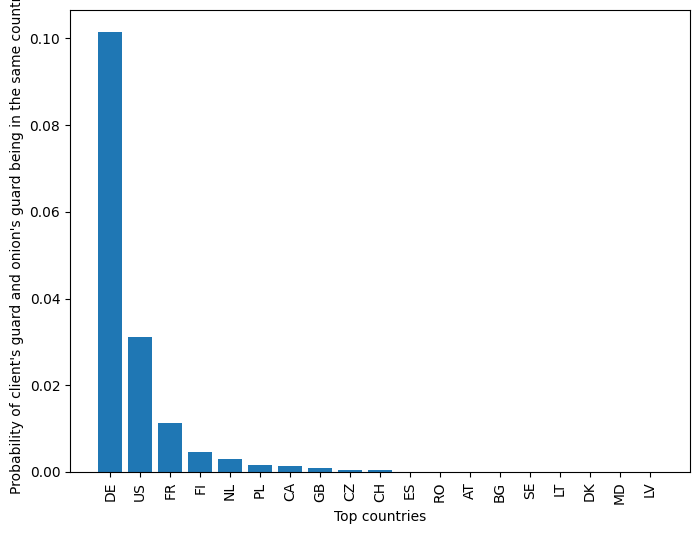

In [13]:
def plot_matching_countries():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches

    # Extract keys and lengths
    keys = list(matching_countries.keys())
    lengths = [(s/len(data)) for s in matching_countries.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    # Create a bar plot
    plt.bar(sorted_keys, sorted_lengths)

    print("sorted_lengths", sorted_lengths)

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel(f'Top countries')
    plt.ylabel('Probability of client\'s guard and onion\'s guard being in the same country')

    plt.savefig('./data/guard_nodes_matching_countries.pdf')
    plt.savefig('./data/guard_nodes_matching_countries.png')
    
    # Display the plot
    plt.show()

plot_matching_countries()

colluding_countries ('DE',)
colluding_countries ('DE', 'US')
colluding_countries ('DE', 'US', 'FR')
colluding_countries ('DE', 'US', 'FR', 'FI')
colluding_countries ('DE', 'US', 'FR', 'FI', 'NL')
colluding_countries ('DE', 'US', 'FR', 'FI', 'NL', 'PL')
colluding_countries ('DE', 'US', 'FR', 'FI', 'NL', 'PL', 'CA')
colluding_countries ('DE', 'US', 'FR', 'FI', 'NL', 'PL', 'CA', 'GB')
colluding_countries ('DE', 'US', 'FR', 'FI', 'NL', 'PL', 'CA', 'GB', 'CZ')
colluding_countries ('DE', 'US', 'FR', 'FI', 'NL', 'PL', 'CA', 'GB', 'CZ', 'CH')
colluding_countries ('DE', 'US', 'FR', 'FI', 'NL', 'PL', 'CA', 'GB', 'CZ', 'CH', 'ES')
colluding_countries ('DE', 'US', 'FR', 'FI', 'NL', 'PL', 'CA', 'GB', 'CZ', 'CH', 'ES', 'RO')
colluding_countries ('DE', 'US', 'FR', 'FI', 'NL', 'PL', 'CA', 'GB', 'CZ', 'CH', 'ES', 'RO', 'AT')
colluding_countries ('DE', 'US', 'FR', 'FI', 'NL', 'PL', 'CA', 'GB', 'CZ', 'CH', 'ES', 'RO', 'AT', 'BG')
colluding_countries ('DE', 'US', 'FR', 'FI', 'NL', 'PL', 'CA', 'GB', 'CZ', 

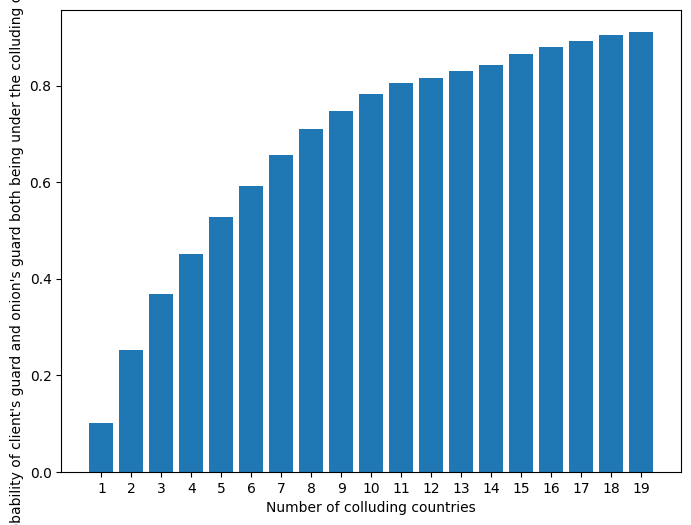

In [14]:
def plot_collusion_table_countries():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches

    # Extract keys and lengths
    keys = list(matching_countries.keys())
    lengths = [(s/len(data)) for s in matching_countries.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    x = np.arange(1, 20) # number of colluding ases
    y = []
    for i, x_val in enumerate(x):
        y.append(0)
        matching_colluding_countries = {}
        colluding_countries = sorted_keys[: x_val]
        print("colluding_countries", colluding_countries)
        for session in data:
            if session.client_country_code in colluding_countries and session.onion_country_code in colluding_countries:
                y[i] += 1
        y[i] /= len(data)

    # Create a bar plot
    plt.bar(x, y)

    plt.xticks(x, x)

    print("y", y)

    # Add labels and title
    plt.xlabel('Number of colluding countries')
    plt.ylabel('Probability of client\'s guard and onion\'s guard both being under the colluding countries')

    plt.savefig('./data/guard_nodes_colluding_countries.pdf')
    plt.savefig('./data/guard_nodes_colluding_countries.png')
    
    # Display the plot
    plt.show()

plot_collusion_table_countries()

In [15]:
def get_as_number(as_name):
    # Define a regex pattern to match common AS number formats
    pattern = r'\bAS\s?(\d+)\b'
    
    # Search for the pattern in the AS name
    match = re.search(pattern, as_name, re.IGNORECASE)
    
    if match:
        return match.group()
        #return match.group(1)
    else:
        return None

sorted_lengths (0.03771965259543526, 0.028883053928499294, 0.00414057766107857, 0.0016663300343364978, 0.0009341547162189457, 0.0003787113714401131, 0.0003787113714401131, 0.00027772167238941626, 0.00025247424762674206, 0.00017673197333871945, 0.00017673197333871945, 0.00017673197333871945, 0.00015148454857604525, 0.00012623712381337103, 0.00010098969905069682, 0.00010098969905069682, 7.574227428802263e-05, 5.049484952534841e-05, 5.049484952534841e-05, 5.049484952534841e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05, 2.5247424762674206e-05)


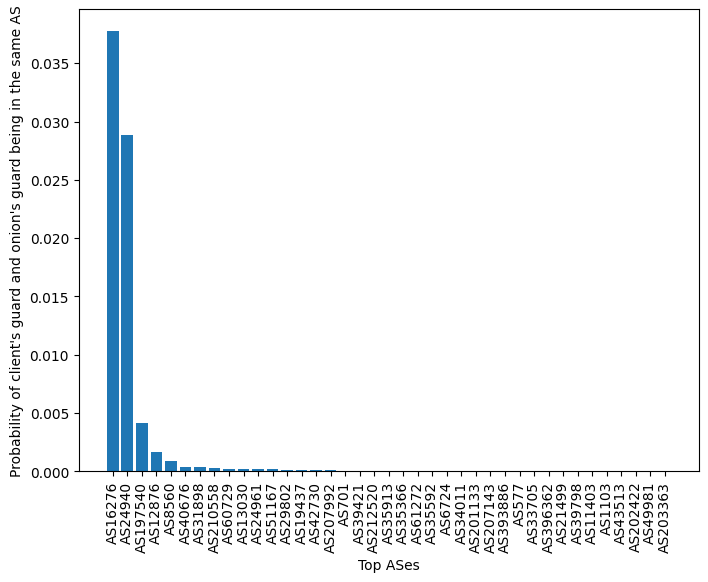

In [16]:
def plot_matching_ases():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches

    # Extract keys and lengths
    keys = []
    for as_name in matching_ases.keys():
        keys.append(get_as_number(as_name))
    lengths = [(s/len(data)) for s in matching_ases.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    # Create a bar plot
    plt.bar(sorted_keys, sorted_lengths)

    print("sorted_lengths", sorted_lengths)

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel(f'Top ASes')
    plt.ylabel('Probability of client\'s guard and onion\'s guard being in the same AS')

    plt.savefig('./data/guard_nodes_matching_ases.pdf')
    plt.savefig('./data/guard_nodes_matching_ases.png')
    
    # Display the plot
    plt.show()

plot_matching_ases()

colluding_ases ('AS16276 OVH SAS',)
colluding_ases ('AS16276 OVH SAS', 'AS24940 Hetzner Online GmbH')
colluding_ases ('AS16276 OVH SAS', 'AS24940 Hetzner Online GmbH', 'AS197540 netcup GmbH')
colluding_ases ('AS16276 OVH SAS', 'AS24940 Hetzner Online GmbH', 'AS197540 netcup GmbH', 'AS12876 SCALEWAY S.A.S.')
colluding_ases ('AS16276 OVH SAS', 'AS24940 Hetzner Online GmbH', 'AS197540 netcup GmbH', 'AS12876 SCALEWAY S.A.S.', 'AS8560 IONOS SE')
colluding_ases ('AS16276 OVH SAS', 'AS24940 Hetzner Online GmbH', 'AS197540 netcup GmbH', 'AS12876 SCALEWAY S.A.S.', 'AS8560 IONOS SE', 'AS40676 Psychz Networks')
colluding_ases ('AS16276 OVH SAS', 'AS24940 Hetzner Online GmbH', 'AS197540 netcup GmbH', 'AS12876 SCALEWAY S.A.S.', 'AS8560 IONOS SE', 'AS40676 Psychz Networks', 'AS31898 Oracle Corporation')
colluding_ases ('AS16276 OVH SAS', 'AS24940 Hetzner Online GmbH', 'AS197540 netcup GmbH', 'AS12876 SCALEWAY S.A.S.', 'AS8560 IONOS SE', 'AS40676 Psychz Networks', 'AS31898 Oracle Corporation', 'AS210

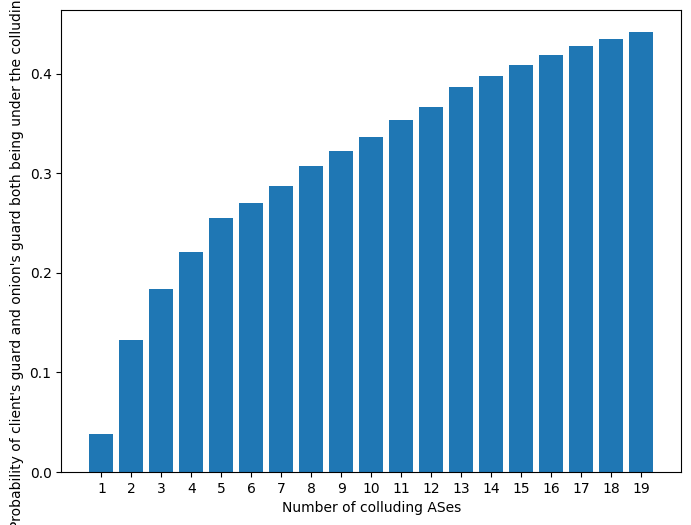

In [17]:
def plot_collusion_table_ases():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches

    # Extract keys and lengths
    keys = list(matching_ases.keys())
    lengths = [(s/len(data)) for s in matching_ases.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    x = np.arange(1, 20) # number of colluding ases
    y = []
    for i, x_val in enumerate(x):
        y.append(0)
        matching_colluding_ases = {}
        colluding_ases = sorted_keys[: x_val]
        print("colluding_ases", colluding_ases)
        for session in data:
            if session.client_as in colluding_ases and session.onion_as in colluding_ases:
                y[i] += 1
        y[i] /= len(data)

    # Create a bar plot
    plt.bar(x, y)

    plt.xticks(x, x)

    print("y", y)

    # Add labels and title
    plt.xlabel('Number of colluding ASes')
    plt.ylabel('Probability of client\'s guard and onion\'s guard both being under the colluding ASes')

    plt.savefig('./data/guard_nodes_colluding_ases.pdf')
    plt.savefig('./data/guard_nodes_colluding_ases.png')
    
    # Display the plot
    plt.show()

plot_collusion_table_ases()

#### RIR servers
* ARIN: whois.arin.net -> United States, Canada, many Caribbean and North Atlantic islands
* RIPE NCC: whois.ripe.net -> Europe, the Middle East and parts of Central Asia
* APNIC: whois.apnic.net -> Asia Pacific
* LACNIC: whois.lacnic.net -> Latin America and the Caribbean
* AFRINIC: whois.afrinic.net -> Africa

### Query WHOIS databases to know the company that owns an AS

In [18]:
# rir_server_mappings = {"ARIN": "whois.arin.net",
#                     "RIPE NCC": "whois.ripe.net",
#                     "APNIC": "whois.apnic.net",
#                     "LACNIC": "whois.lacnic.net", 
#                     "AFRINIC": "whois.afrinic.net"
#                     }

# def scrape_country_rir_mappings(url):
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, 'html.parser')
    
#     country_rir_mappings = {}

#     table = soup.find('table')
#     rows = table.find_all('tr')[1:]  # Skip the header row
    
#     for row in rows:
#         columns = row.find_all('td')
#         if len(columns) >= 2:
#             country_code = columns[1].text.strip()
#             rir_server = columns[3].text.strip()
#             country_rir_mappings[country_code] = rir_server
    
#     return country_rir_mappings

# country_rir_mappings = scrape_country_rir_mappings("https://www.nro.net/list-of-country-codes-ordered-by-rir/")
# print("country_rir_mappings", country_rir_mappings)

In [19]:
def get_rir_server_by_country_code(country_code):
    return rir_server_mappings[country_rir_mappings[country_code]]

In [20]:
ENCODING = "ISO-8859-1"

def parse_org_value(whois_output):
    try:
        #org_match = re.search(r'(org|orgName):\s*([A-Z0-9-]+)', whois_output, re.IGNORECASE)
        #org_match = re.search(r'(org-name|orgName):\s*([A-Z0-9-]+)', whois_output, re.IGNORECASE)
        org_match = re.search(r'(org-name|orgName):\s*(.*?)\n', whois_output, re.IGNORECASE | re.DOTALL)
        print("org_match", org_match)
        if org_match:
            org_value = org_match.group(2)
            return org_value
        else:
            return None
    except UnicodeDecodeError:
        return None

#def get_as_owner(as_number, whois_server):
class WhoisException(Exception):
    def __init__(self, message):
        super().__init__(message)

@retry(wait_exponential_multiplier=1000, wait_exponential_max=10000, stop_max_attempt_number=3)
def get_as_owner(as_number):
    #command = ["whois", "-h", whois_server, as_number]
    command = ["whois", as_number]
    result = subprocess.run(command, 
                            capture_output=True, 
                            text=True,
                            universal_newlines=True,
                            encoding=ENCODING,
                            errors='ignore')

    #print("result.stdout", result.stdout)
    #owner = parse_org_value(result.stdout.encode(ENCODING, errors='ignore').decode(ENCODING, errors='ignore'))
    owner = parse_org_value(result.stdout)
    if not owner:
        raise WhoisException("Failed to get AS owner")
    return owner

In [21]:
# def matching_companies(guards_data):


In [22]:
# def get_companies_in_batch():
#     client_output_file = "client_ip_addresses.txt"
#     with open(client_output_file, "w") as f:
#         for ip in client_ips:
#             f.write(ip + "\n")

#     onion_output_file = "onion_ip_addresses.txt"
#     with open(onion_output_file, "w") as f:
#         for ip in onion_ips:
#             f.write(ip + "\n")

#     # Taken from: https://github.com/jmslsr/bulk-whois/tree/master
#     #command = f"./bulk-whois.sh {client_output_file}"
#     #subprocess.Popen(shlex.split(command))

#     requests.get("whois.cymru.com")

#     #command = f"./bulk-whois.sh {onion_output_file}"
#     #subprocess.Popen(shlex.split(command))

In [23]:
# def count_matching_companies_parallel():
#     global total_matching_companies
    
#     parallel_results = Parallel(n_jobs=-1)(delayed(matching_companies)(*arg) for session, guards_data in guard_nodes.items()):

#     #for session, guards_data in guard_nodes.items():
#         client_guard_data = guards_data['client_guard_data']
#         onion_guard_data = guards_data['onion_guard_data']

#         if client_guard_data == {} or onion_guard_data == {}:
#             continue

#         client_as = get_as(client_guard_data) 
#         onion_as = get_as(onion_guard_data) 
#         if client_as == "" or onion_as == "":
#             continue

#         client_as_number = get_as_number(client_as)
#         onion_as_number = get_as_number(onion_as)
#         print("client_as_number", client_as_number)
#         print("onion_as_number", onion_as_number)

#         client_country_code = get_country_code(client_guard_data)
#         onion_country_code = get_country_code(onion_guard_data)

#         client_rir = get_rir_server_by_country_code(client_country_code)
#         onion_rir = get_rir_server_by_country_code(onion_country_code)
#         print("client_rir", client_rir)
#         print("onion_rir", onion_rir)

#         client_company = get_as_owner(client_as_number, client_rir)
#         onion_company = get_as_owner(onion_as_number, onion_rir)
#         print("client_company", client_company)
#         print("onion_company", onion_company)

#         if client_company == onion_company:
#             if client_company not in matching_companies:
#                 matching_companies[client_company] = 0
#             matching_companies[client_company] += 1
#             total_matching_companies += 1

#     parallel_results = Parallel(n_jobs=-1)(delayed(run_whois)(*arg) for arg in arguments)

# count_matching_companies_parallel()
# print("\ntotal_matching_companies", total_matching_companies)
# print("\ntotal_occurences", total_occurences)
# print("\total_matching_companies / total_occurences", total_matching_companies / total_occurences)
# print("\nmatching_countries", matching_countries)


In [24]:
# def count_matching_companies_parallel():
#     global total_matching_companies

#     for session in data:

#         client_as_number = get_as_number(session.client_as)
#         onion_as_number = get_as_number(session.onion_as)
#         print("client_as_number", client_as_number)
#         print("onion_as_number", onion_as_number)

#         client_rir = get_rir_server_by_country_code(session.client_country_code)
#         onion_rir = get_rir_server_by_country_code(session.onion_country_code)
#         print("client_rir", client_rir)
#         print("onion_rir", onion_rir)

#         client_company = get_as_owner(client_as_number, client_rir)
#         onion_company = get_as_owner(onion_as_number, onion_rir)
#         print("client_company", client_company)
#         print("onion_company", onion_company)

#         if client_company == onion_company:
#             if client_company not in matching_companies:
#                 matching_companies[client_company] = 0
#             matching_companies[client_company] += 1
#             total_matching_companies += 1

#     parallel_results = Parallel(n_jobs=-1)(delayed(run_whois)(*arg) for arg in arguments)

# count_matching_companies_parallel()
# print("\ntotal_matching_companies", total_matching_companies)
# print("\ntotal_occurences", total_occurences)
# print("\total_matching_companies / total_occurences", total_matching_companies / total_occurences)
# print("\nmatching_countries", matching_countries)


In [25]:
as_to_owner_mapping = {}

def get_as_owners():
    for as_name in ases:
        as_number = get_as_number(as_name)
        print("as_number", as_number)
        try:
            owner = get_as_owner(as_number)
        except Exception as e:
            continue
        as_to_owner_mapping[as_name] = owner

get_as_owners()
print(as_to_owner_mapping)


as_number AS52048
org_match <re.Match object; span=(2347, 2377), match='org-name:       DataClub S.A.\n'>
as_number AS197922
org_match <re.Match object; span=(2144, 2183), match='org-name:       Techcrea Solutions SAS\n'>
as_number AS11572
org_match <re.Match object; span=(527, 558), match='OrgName:        PhoenixNAP LLC\n'>
as_number AS48101
org_match <re.Match object; span=(3818, 3845), match='org-name:       Trooli Ltd\n'>
as_number AS12508
org_match <re.Match object; span=(5752, 5784), match='org-name:       Rainside s.r.o.\n'>
as_number AS18460
org_match <re.Match object; span=(525, 568), match='OrgName:        Fort Hays State University\n'>
as_number AS49544
org_match <re.Match object; span=(256902, 256930), match='org-name:       i3D.net B.V\n'>
as_number AS3842
org_match <re.Match object; span=(525, 564), match='OrgName:        InMotion Hosting, Inc.\n'>
as_number AS207279
org_match <re.Match object; span=(1458, 1528), match='org-name:       MARKAHOST TELEKOMUNIKASYON VE TIC>
a

In [26]:
import json

as_to_owner_mapping_json_file = "as_to_owner_mapping.json"

with open(as_to_owner_mapping_json_file, "w") as outfile:
    json.dump(as_to_owner_mapping, outfile) 

In [27]:
def count_matching_companies():
    total_matching_companies = 0
    matching_companies = {}
    
    for session in data:
        client_owner = as_to_owner_mapping[session.client_as]
        onion_owner = as_to_owner_mapping[session.onion_as]
        if client_owner == onion_owner:
            if client_owner not in matching_companies:
                matching_companies[client_owner] = 0
            matching_companies[client_owner] += 1
            total_matching_companies += 1

    return total_matching_companies, matching_companies

total_matching_companies, matching_companies = count_matching_companies()
print("\ntotal_matching_companies", total_matching_companies)
print("\ntotal_occurences", len(data))
print("\ntotal_matching_companies / total_occurences", total_matching_companies / len(data))
print("\nmatching_companies", matching_companies)


total_matching_companies 3038

total_occurences 39608

total_matching_companies / total_occurences 0.07670167642900425

matching_companies {'SECURED SERVERS LLC': 5, 'HIVELOCITY, Inc.': 6, 'OVH SAS': 1494, 'Psychz Networks': 15, 'SCALEWAY S.A.S.': 66, 'netcup GmbH': 164, 'ISPpro Internet KG': 1, 'Hetzner Online GmbH': 1148, 'Sapinet SAS': 2, 'Verizon Business': 3, 'IONOS SE': 37, 'EVANZO e-commerce GmbH': 4, 'Leaseweb USA, Inc.': 8, 'David Tatlisu': 2, 'Init7 (Switzerland) Ltd.': 7, '1337 Services GmbH': 11, 'Informacines sistemos ir technologijos, UAB': 1, 'Coolhousing s.r.o.': 1, 'Strato AG': 1, 'Oracle Corporation': 15, 'Zwiebelfreunde e.V.': 10, 'Host Europe GmbH': 5, 'FEELB SARL': 4, 'myLoc managed IT AG': 7, 'Verdina Ltd.': 1, 'hosttech GmbH': 1, 'Contabo GmbH': 7, 'Bell Canada': 1, 'DediPath': 2, 'Digital Shape Technologies Inc.': 1, 'MivoCloud SRL': 1, 'NYI': 1, 'SURF B.V.': 1, 'Sia Nano IT': 2, 'G-Core Labs S.A.': 1, 'WorldStream B.V.': 1, 'Kuroit Limited': 1}


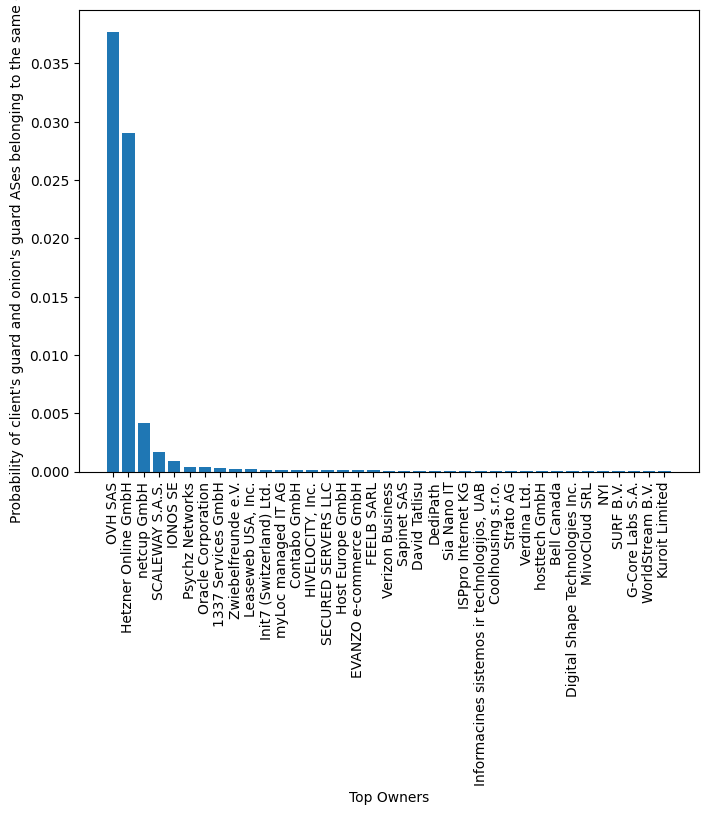

In [28]:
def plot_matching_companies():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches

    # Extract keys and lengths
    keys = list(matching_companies.keys())
    lengths = [(s/len(data)) for s in matching_companies.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    # Create a bar plot
    plt.bar(sorted_keys, sorted_lengths)

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel('Top Owners')
    plt.ylabel('Probability of client\'s guard and onion\'s guard ASes belonging to the same entity')

    # Display the plot
    plt.show()

plot_matching_companies()